## Competition 

Since you are now a new expert on GNNs, let's compete. We created on Kaggle a private leaderboard to test your skills on another dataset encoding molecular compounds : [Kaggle Competition](https://www.kaggle.com/competitions/graph-machine-learning-in-yamoussoukro/)

Here's your invitation link : https://www.kaggle.com/t/0ea1ce3977c54b3eb0d6d1983fa600a7

It's still a binary classification task, but now you only have access to the graph of the test set, but not their properties to predict ! 

To compete, you will need to learn a model using the `train_dataset` provided in `train_dataset.pt` file. The submission file for Kaggle competition can be obtained using the `generate_pred_for_kaggle` and `generate_kaggle_file` functions provided in `kaggle.py` file. 

The train dataset is composed of 2168 molecules, where each node is encoded by 14 binary values corresponding to a one hot encoding of the corresponding atom. Test set is composed of 2169 molecules and encoded in the same way as the train set, except the `y` value.

You are allowed to use any model you want, GNN or other, but you are not allowed to use the test set to train your model.

Do your best ! 

In [ ]:
# Install torch package
#!pip install torch torchvision torchaudio
#!pip install networkx



In [48]:
import torch 
import random
random.seed(18)
# Load the data

train_dataset = torch.load("./data/train_dataset.pt")
test_dataset = torch.load("./data/test_dataset.pt")

C:\Users\COULIBALYPEKANRIKADI\AppData\Local\Temp\ipykernel_8912\59041321.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load("./data/train_dataset

In [49]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)


In [32]:
import networkx as nx
from torch_geometric.utils import to_networkx

# Convertir le dataset en un graphe NetworkX
G = to_networkx(train_dataset[6], to_undirected=True)

# Nombre de nœuds
num_nodes = G.number_of_nodes()
print(f"Nombre de nœuds: {num_nodes}")

# Nombre d'arêtes
num_edges = G.number_of_edges()
print(f"Nombre d'arêtes: {num_edges}")

# Degré moyen
average_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Degré moyen: {average_degree}")

# Diamètre du graphe (longueur du plus long chemin le plus court)
diameter = nx.diameter(G)
print(f"Diamètre: {diameter}")

# Densité du graphe
density = nx.density(G)
print(f"Densité: {density}")

# Degré de chaque nœud
degree_dict = dict(G.degree())
print(f"Degré de chaque nœud: {degree_dict}")

Nombre de nœuds: 32
Nombre d'arêtes: 34
Degré moyen: 2.125
Diamètre: 10
Densité: 0.06854838709677419
Degré de chaque nœud: {0: 3, 1: 3, 2: 3, 3: 4, 4: 3, 5: 2, 6: 3, 7: 4, 8: 3, 9: 3, 10: 4, 11: 2, 12: 3, 13: 4, 14: 4, 15: 2, 16: 3, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1}


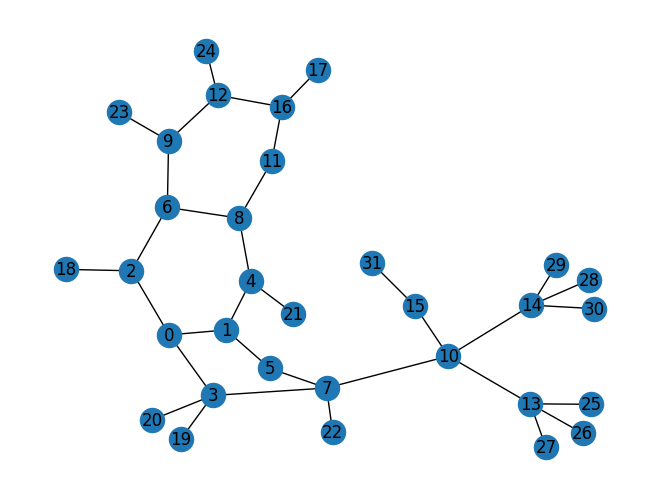

In [33]:
# Visualisation du graphe
nx.draw(G, with_labels=True)

In [73]:
import importlib
import gnns


# Recharger le module gnns après modification
importlib.reload(gnns)

<module 'gnns' from 'c:\\Users\\COULIBALYPEKANRIKADI\\cpkv\\ECOLE\\INP\\M2\\MOI\\GNN\\PROJET_GNN\\gnns.py'>

In [52]:
# diviser le fichier train_loader en train_loader et val_loader de manière aléatoire

train_loader = DataLoader(train_dataset[:int(len(train_dataset)*0.8)], batch_size=64, shuffle=True)
val_loader = DataLoader(train_dataset[int(len(train_dataset)*0.8):], batch_size=64, shuffle=True)

In [36]:
from gnns import FirstGNN
from gnns import learn_and_perf

model = FirstGNN()

acc_train, acc_test, losses  = learn_and_perf(model, train_loader, val_loader, nb_epochs=100)


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


In [ ]:
from gnns import SecondGNN
from gnns import learn_and_perf

model = SecondGNN(in_channels=14, hidden_channels=64, out_channels=2)


acc_train, acc_test, losses  = learn_and_perf(model, train_loader, val_loader, nb_epochs=300) #nb_epochs=100

  0%|          | 0/300 [00:00<?, ?it/s]

  1%|          | 3/300 [00:04<06:54,  1.40s/it]


KeyboardInterrupt: 

In [74]:
from gnns import ThirdGNN
from gnns import learn_and_perf



model1 = ThirdGNN(in_channels=14, hidden_channels1=64,hidden_channels2=124,hidden_channels3=64, out_channels=2)


acc_train, acc_test, losses  = learn_and_perf(model1, train_loader, val_loader, nb_epochs=275) #nb_epochs=100

  0%|          | 0/275 [00:00<?, ?it/s]

100%|██████████| 275/275 [04:56<00:00,  1.08s/it]


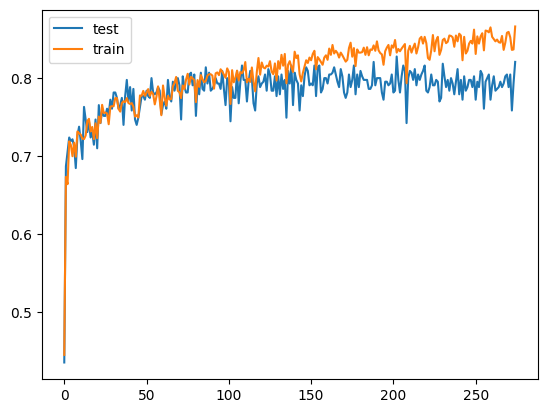

In [75]:
import matplotlib.pyplot as plt
# graphtique de comparaison des performances
plt.plot(acc_test, label="test")
plt.plot(acc_train, label="train")
plt.legend()

In [ ]:
print(acc_train)


In [76]:
from kaggle import generate_pred_for_kaggle, generate_kaggle_file
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
preds = generate_pred_for_kaggle(model, test_loader)
generate_kaggle_file(preds, "./kaggle3.csv")
